## Census Income Data Set

### Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

### Attribute Information:

Listing of attributes:

1. **>50K, <=50K.**
2. age: continuous.
3. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
4. fnlwgt: continuous.
5. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,    10th, Doctorate, 5th-6th, Preschool.
6. education-num: continuous.
7. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
8. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-    inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
9. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
10. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
11. sex: Female, Male.
12. capital-gain: continuous.
13. capital-loss: continuous.
14. hours-per-week: continuous.
15. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Life cycle of Machine learning Project:
* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training
* Choose best model

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv(r"D:\DATA SCIENCE\FSDS - May 22\EDA\Census\adult.txt",delimiter=",")

## Exploratory Data Analysis
Exploratory Data Analysis(EDA), also known as Data Exploration, is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In [3]:
# Display first five records of the data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Display last five records of the data
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# Number of rows and columns
df.shape

(32561, 15)

In [6]:
# Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
df.describe(include='object').T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170
income,32561,2,<=50K,24720


In [8]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# Making a copy of the data
data_df = df.copy()

In [10]:
# Check sample from the data
data_df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
13385,54,Self-emp-inc,383365,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,70,United-States,>50K
22137,28,Private,176683,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,70,United-States,>50K
14868,19,Private,184737,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,1721,40,United-States,<=50K
9391,42,Private,281209,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,<=50K
26885,34,Private,218164,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Male,0,0,44,United-States,<=50K
12702,23,Private,695136,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,30,United-States,<=50K
31541,26,Private,491862,Assoc-voc,11,Never-married,Exec-managerial,Not-in-family,Black,Female,0,0,40,United-States,<=50K
22437,32,Private,197457,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,1471,0,38,United-States,<=50K
13302,27,?,175552,5th-6th,3,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
16613,53,Private,177647,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Male,0,0,40,United-States,<=50K


In [11]:
data_df.shape

(32561, 15)

## Seperating numerical & categorical columns

In [12]:
numeric_features = [feature for feature in data_df.columns if data_df[feature].dtype != 'O']
categorical_features = [feature for feature in data_df.columns if data_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

We have 9 categorical features : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


## Proportion of count data on categorical columns

In [13]:
for col in categorical_features:
    print(data_df[col].value_counts(normalize=True)*100)
    print('-------------------------')

Private             69.703019
Self-emp-not-inc     7.803814
Local-gov            6.427935
?                    5.638647
State-gov            3.986364
Self-emp-inc         3.427413
Federal-gov          2.948312
Without-pay          0.042996
Never-worked         0.021498
Name: workclass, dtype: float64
-------------------------
HS-grad         32.250238
Some-college    22.391818
Bachelors       16.446055
Masters          5.291607
Assoc-voc        4.244341
11th             3.608612
Assoc-acdm       3.276926
10th             2.865391
7th-8th          1.983969
Prof-school      1.768987
9th              1.578576
12th             1.329812
Doctorate        1.268389
5th-6th          1.022696
1st-4th          0.515955
Preschool        0.156629
Name: education, dtype: float64
-------------------------
Married-civ-spouse       45.993673
Never-married            32.809189
Divorced                 13.645158
Separated                 3.147938
Widowed                   3.049661
Married-spouse-absent  

In [14]:
# replacing special characters
chars_to_remove=['?']
for item in chars_to_remove:
    for col in categorical_features:
        data_df[col]=data_df[col].replace(item,np.nan)

In [15]:
# Check NaN values
data_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

## Univariate Analysis

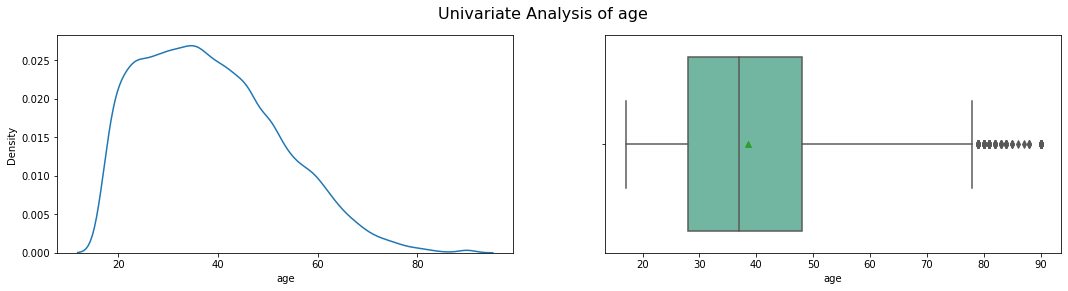

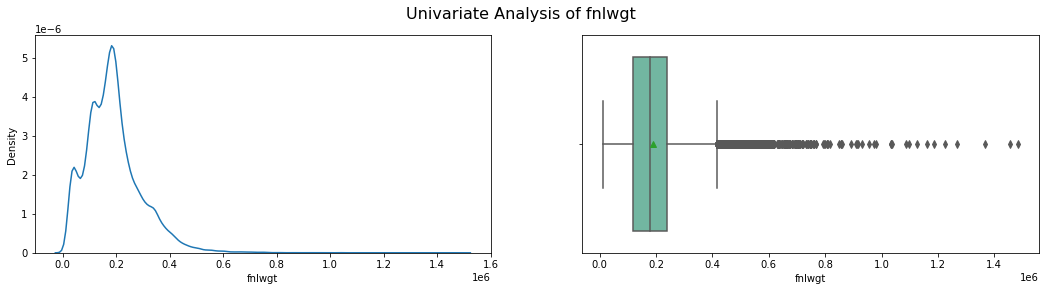

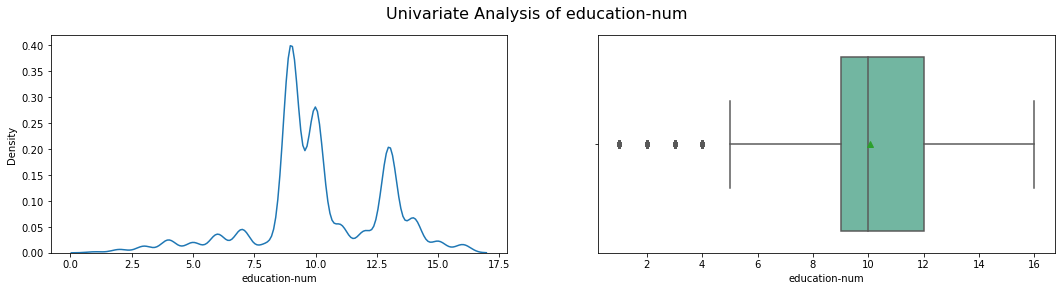

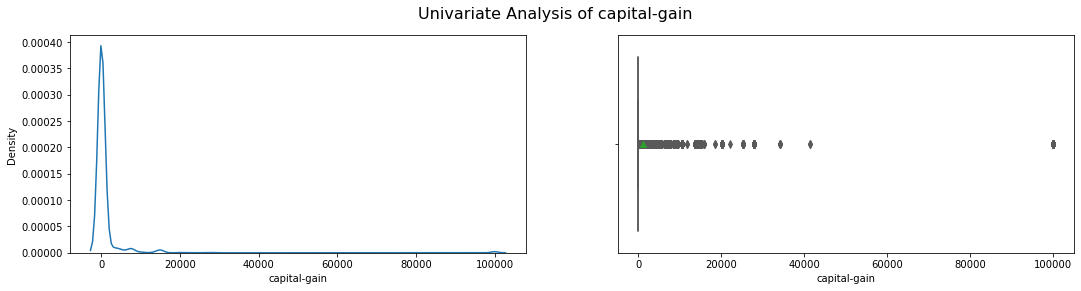

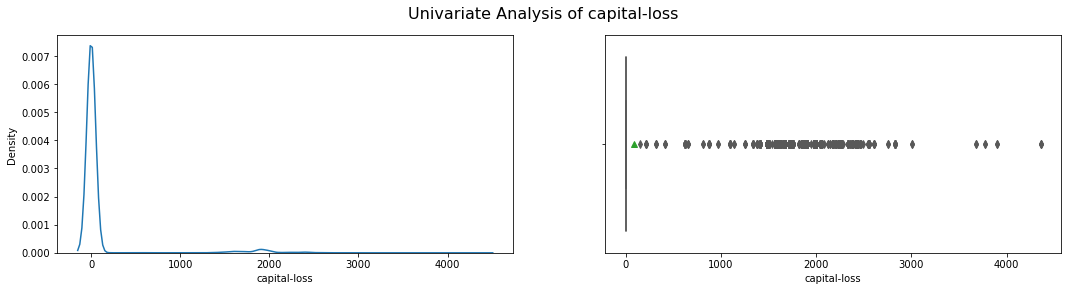

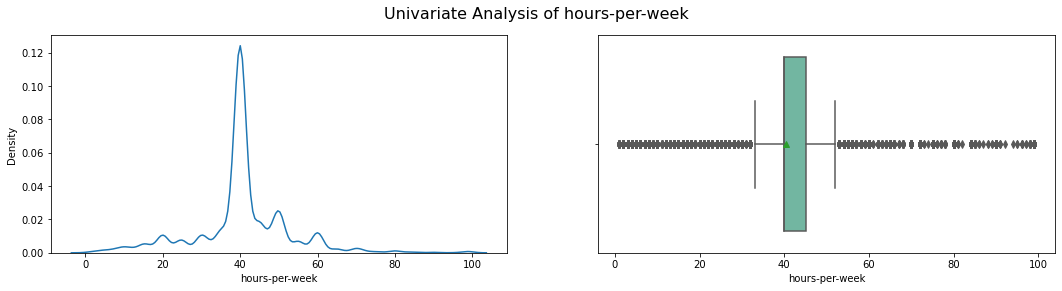

In [16]:
# check the ditribution for the numerical columns
x_axis = numeric_features
for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    sns.distplot(data_df[x], ax=axes[0], kde = True, hist=False)
    sns.boxplot(data_df[x], ax=axes[1], orient = "h", showmeans = True,palette="Set2")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)

All numerical features have outliers

### workclass

In [17]:
data_df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [18]:
data_df['workclass'] = data_df['workclass'].replace(['Self-emp-not-inc','Self-emp-inc'],'Self-employed')
data_df['workclass'] = data_df['workclass'].replace(['Local-gov','State-gov','Federal-gov'],'gov-employee')
data_df['workclass'] = data_df['workclass'].replace(['Without-pay','Never-worked'],'Not-working')

In [19]:
data_df['workclass'].value_counts()

Private          22696
gov-employee      4351
Self-employed     3657
Not-working         21
Name: workclass, dtype: int64

### education

In [20]:
data_df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [21]:
data_df['education'] = data_df['education'].replace(['HS-grad','12th','11th','10th','9th'],'HS-grad')
data_df['education'] = data_df['education'].replace(['1st-4th','5th-6th','7th-8th'],'Primary')
data_df['education'] = data_df['education'].replace(['Assoc-voc','Assoc-acdm'],'Associate')

In [22]:
data_df['education'].value_counts()

HS-grad         13556
Some-college     7291
Bachelors        5355
Associate        2449
Masters          1723
Primary          1147
Prof-school       576
Doctorate         413
Preschool          51
Name: education, dtype: int64

### marital-status

In [23]:
data_df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [24]:
data_df['marital-status'] = data_df['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married')
data_df['marital-status'] = data_df['marital-status'].replace(['Divorced','Separated'],'Separated')

In [25]:
data_df['marital-status'].value_counts()

Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital-status, dtype: int64

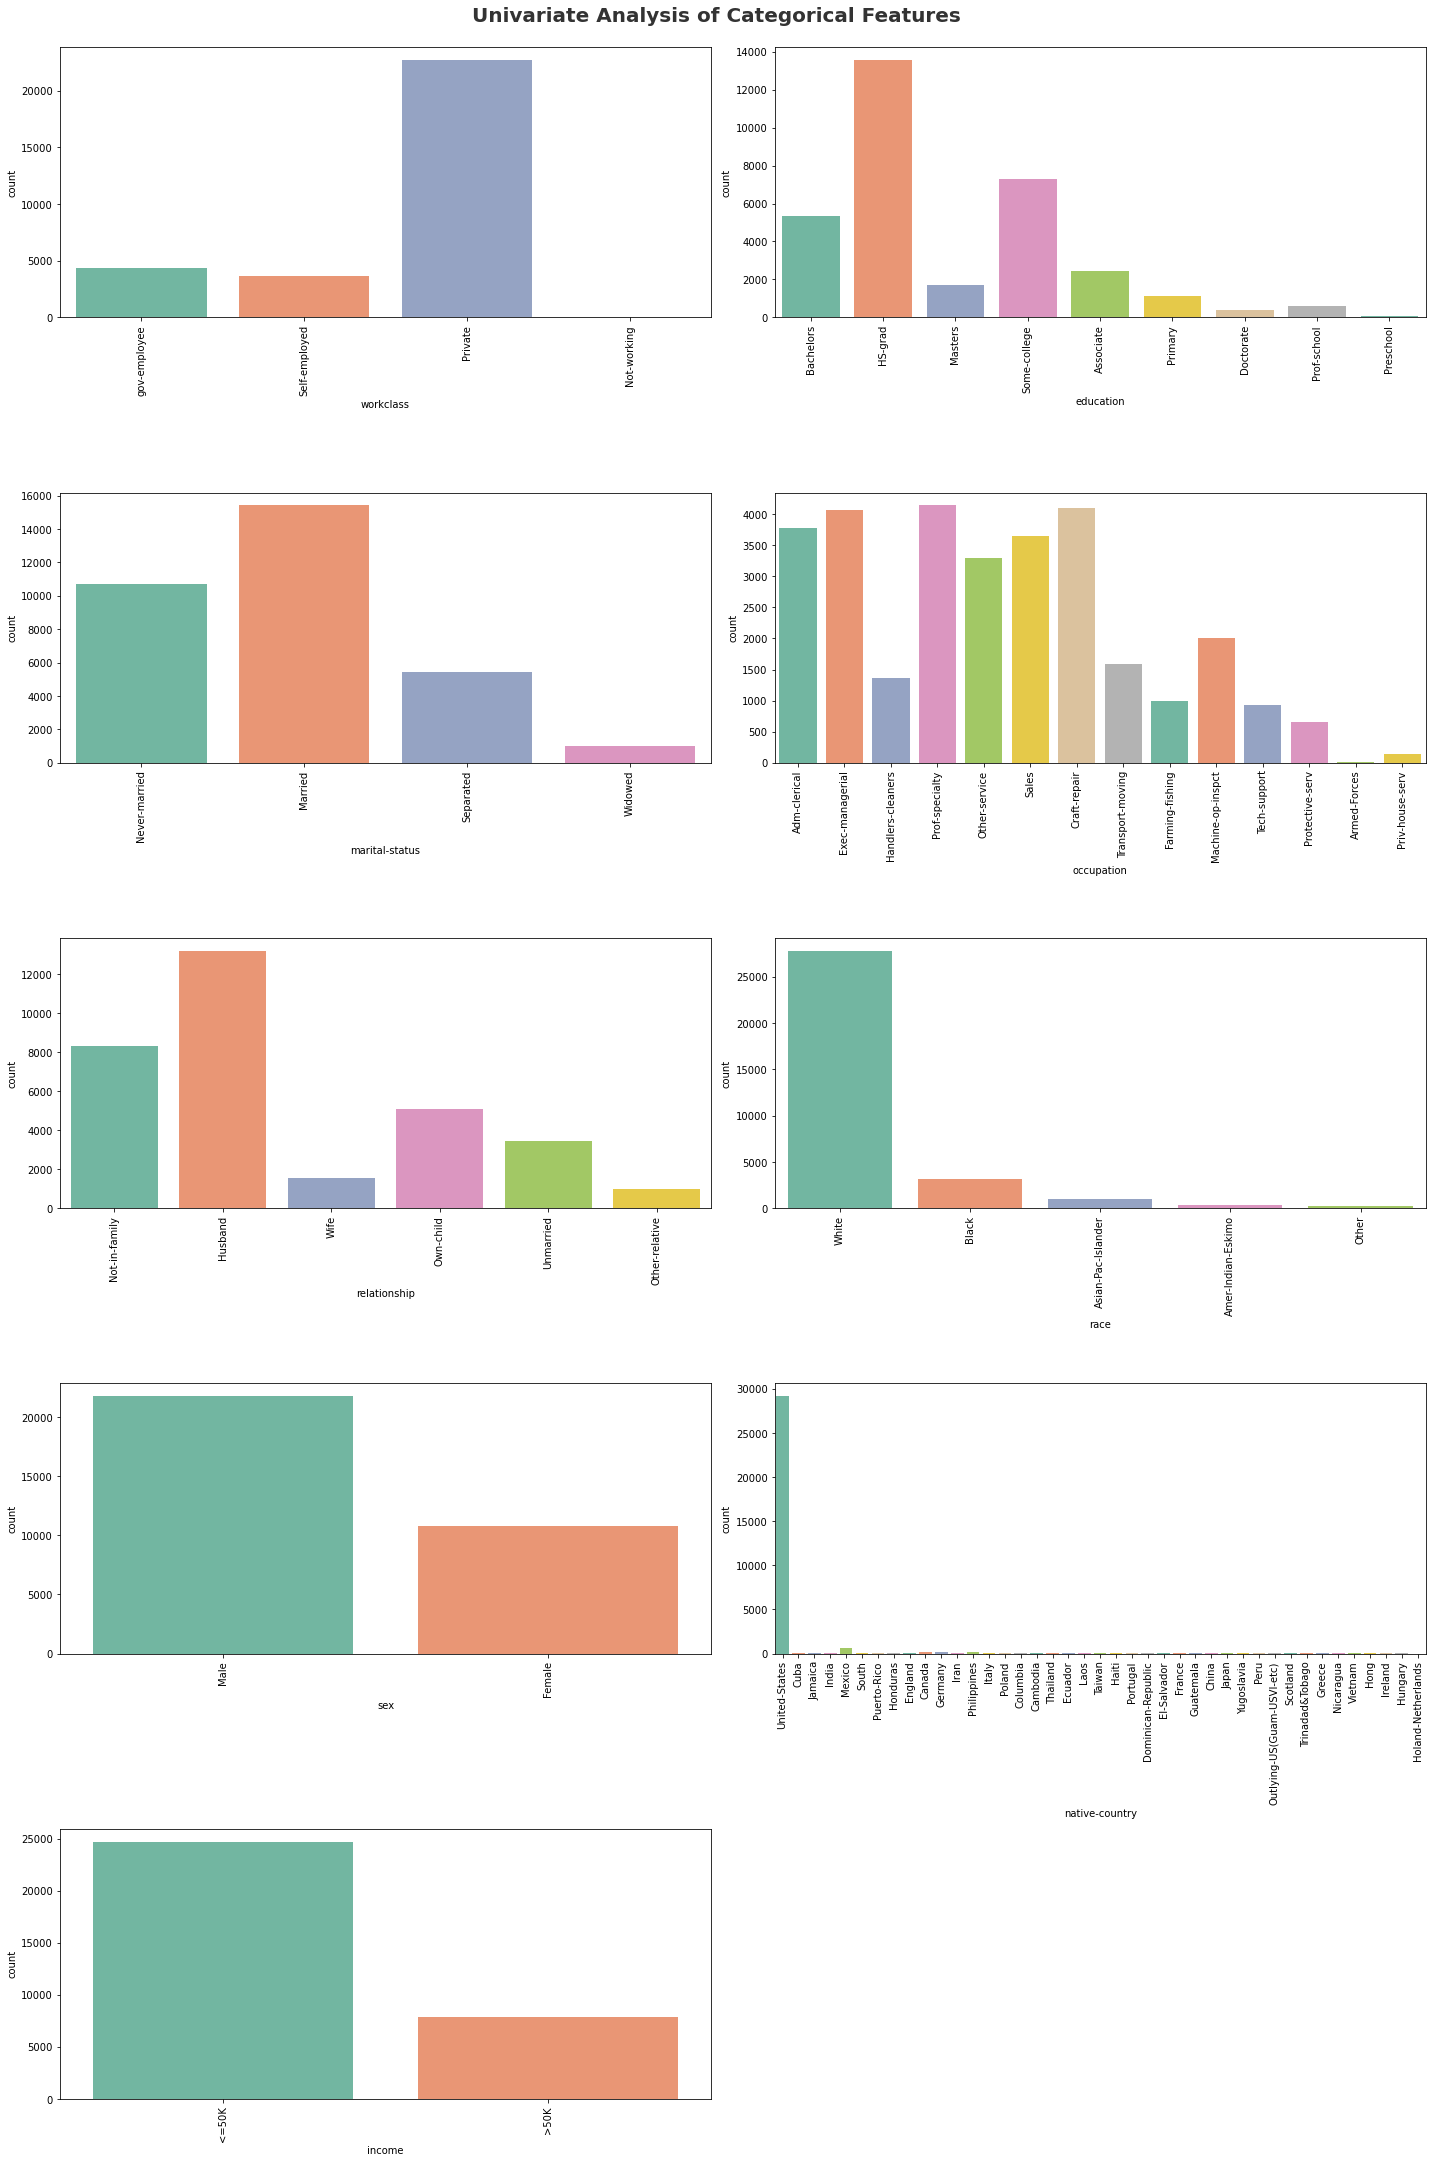

In [26]:
# categorical columns
plt.figure(figsize=(20, 30))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']
for i in range(0, len(category)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=data_df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

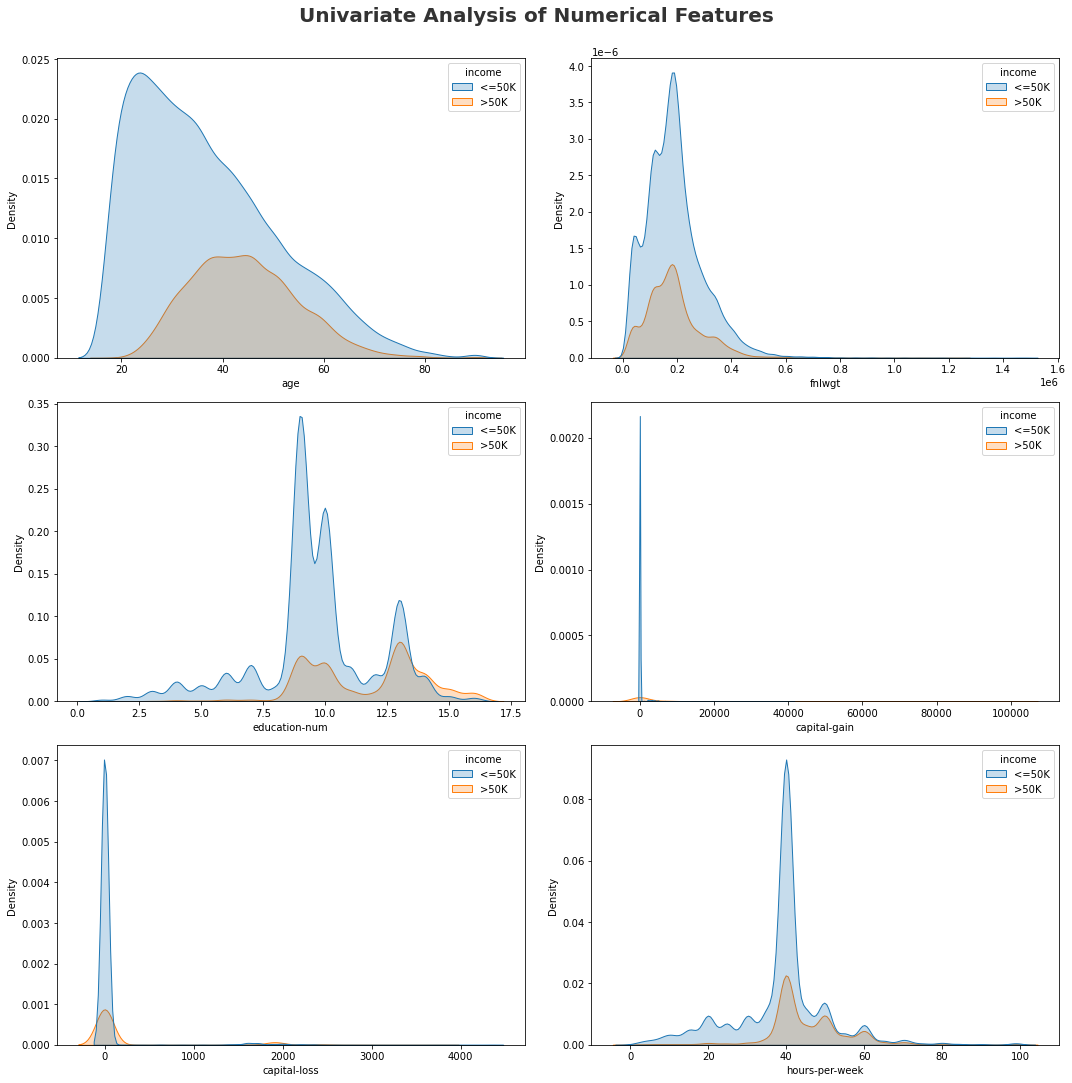

In [27]:
# kdeplot of numerical features
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=data_df[numeric_features[i]],shade=True,color='r',hue=data_df['income'])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Insights
* As we can see our dataset has skewed features which needs to be taken care for better model training

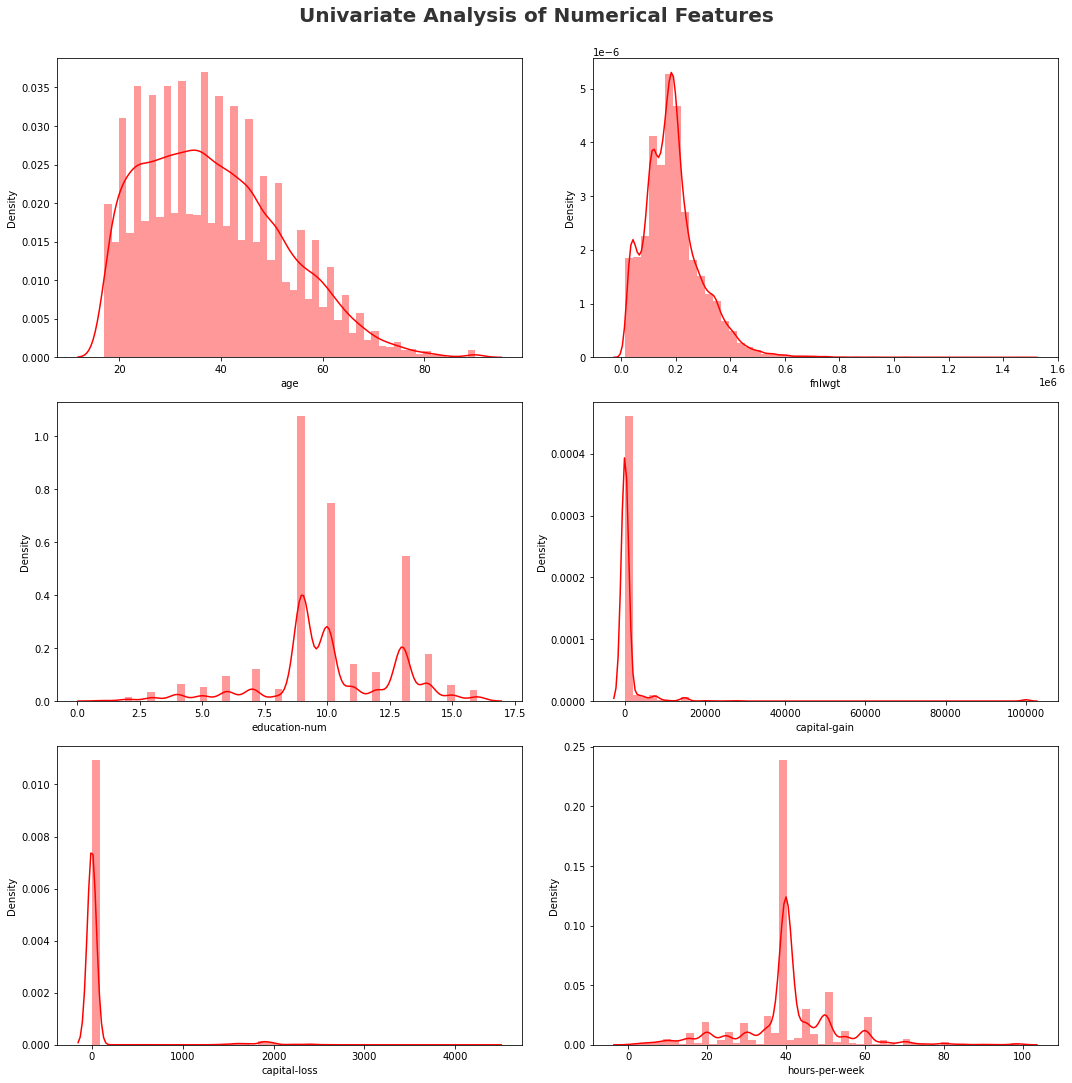

In [28]:
# distplot of numerical features
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 2, i+1)
    sns.distplot(x=data_df[numeric_features[i]],color='r',kde=True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Insights
* The dataset contains people of age group from 19 to 90
* more number of people are seen above 8th grade
* fnlwgt is left skewed
* Normally people are working for 30 to 40 hrs per week 

## Bi variate Analysis

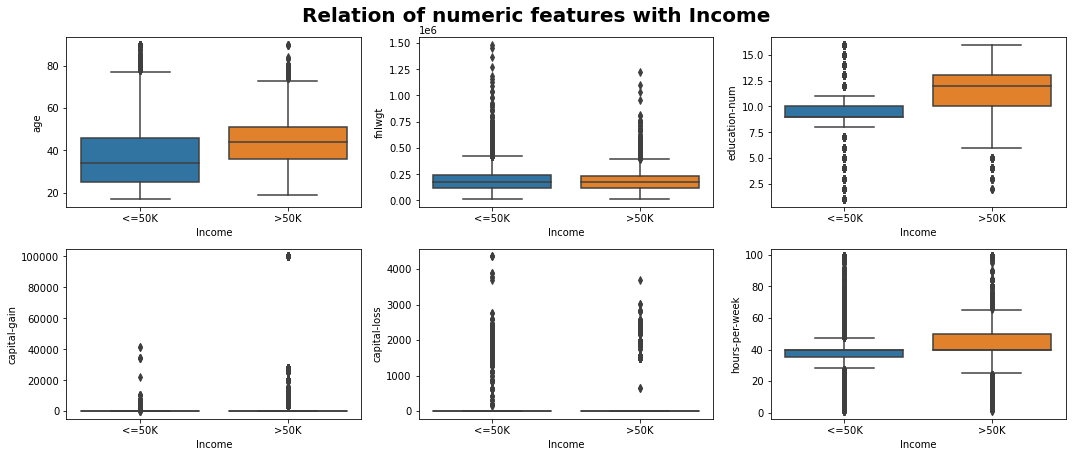

In [29]:
plt.figure(figsize =(15,15))
plt.suptitle('Relation of numeric features with Income',fontsize = 20, fontweight='bold')
for i in range (0, len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=data_df['income'],y=data_df[numeric_features[i]])
    plt.ylabel(numeric_features[i])
    plt.xlabel('Income')
    plt.tight_layout()

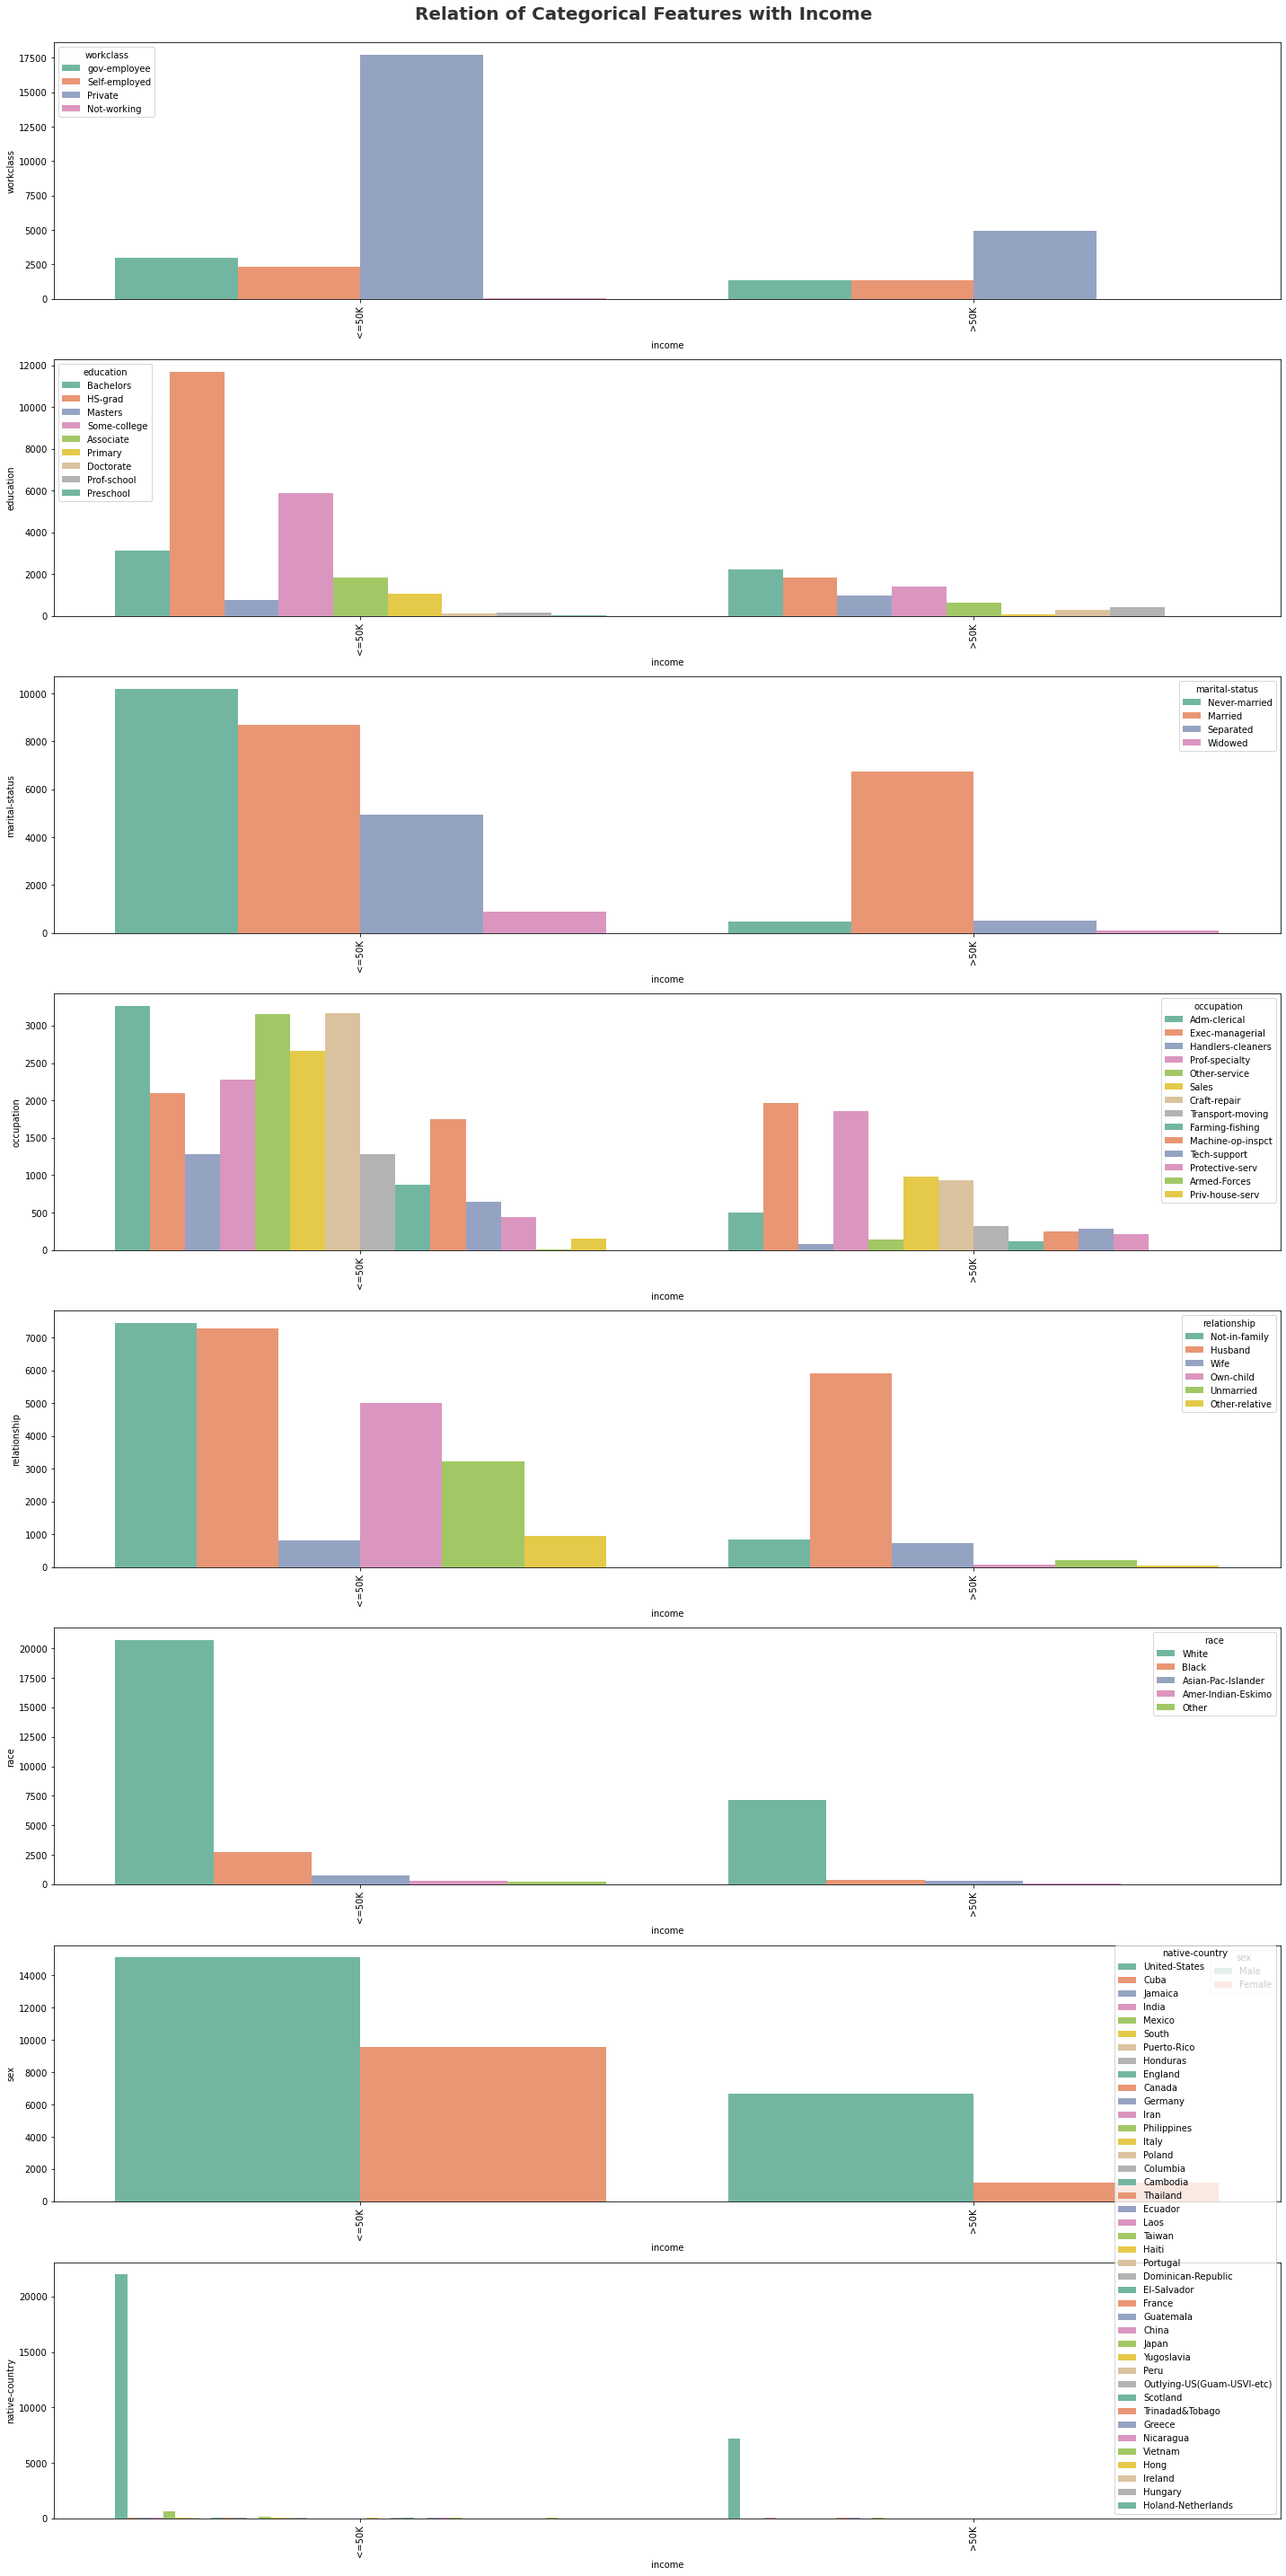

In [30]:
# categorical columns
plt.figure(figsize=(20, 39))
plt.suptitle('Relation of Categorical Features with Income', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
for i in range(0, len(category)):
    plt.subplot(8, 1, i+1)
    sns.countplot(hue=data_df[category[i]],palette="Set2",x=data_df['income'])
    plt.ylabel(category[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

## Handling Missing Values

In [31]:
#Check for Missing data
data_df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [32]:
null_df = pd.DataFrame({'Null Values' : data_df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data_df.isna().sum().sort_values(ascending=False)) / (data_df.shape[0]) * (100)})
null_df

,Null Values,Percentage Null Values
occupation,1843,5.660146
workclass,1836,5.638647
native-country,583,1.790486
age,0,0.000000
fnlwgt,0,0.000000
education,0,0.000000
education-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000


In [33]:
data_df.shape

(32561, 15)

## Drop NA values

In [34]:
data_df = data_df.dropna().reset_index(drop=True)

In [35]:
data_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [36]:
data_df.shape

(30162, 15)

## Correlation using Heatmap

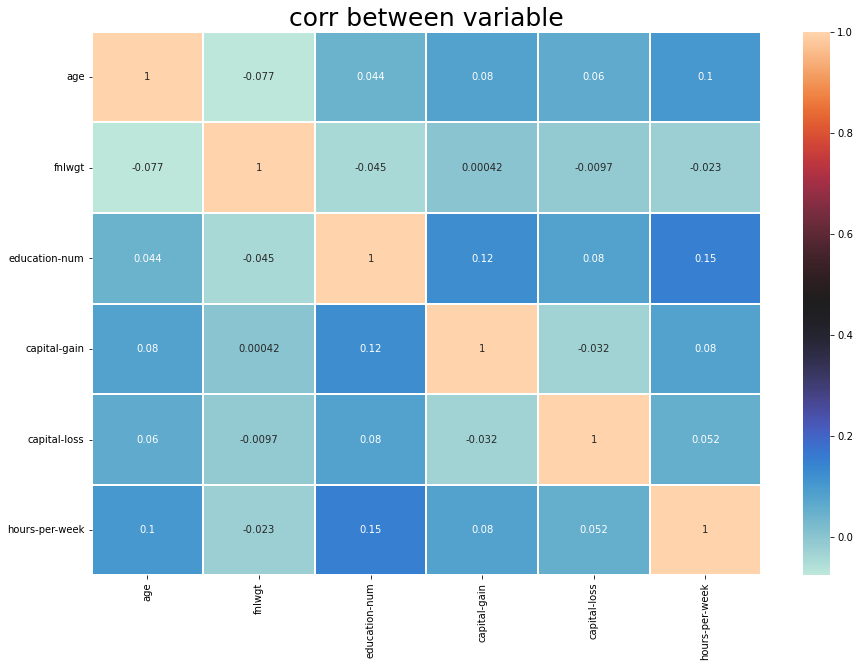

In [37]:
sns.heatmap(data_df.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("corr between variable",color='black',size=25)
plt.show()

## OUTLIERS DETECTION & REMOVAL

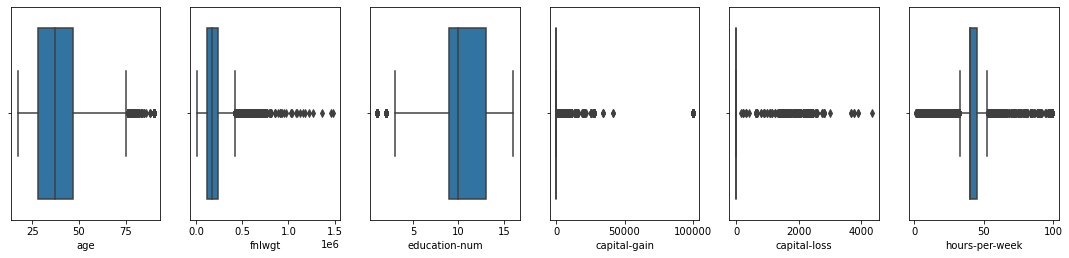

In [38]:
plt.figure(figsize=(22,18))
for i,col in enumerate(numeric_features):
    plt.subplot(4,7,i+1)
    sns.boxplot(data_df[col])

### Interquartile Range Method( IQR ) method

In [39]:
df3 = data_df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df3[col].quantile(0.25)
    percentile75 = df3[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df3[col] = np.where(df3[col]>upper_limit, upper_limit, np.where(df3[col]<lower_limit,lower_limit,df3[col]))
    return df3[df3[col] > upper_limit]

In [40]:
def create_comparison_plot(data_df,df3,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(data_df[column])

    plt.subplot(2,2,2)
    sns.boxplot(data_df[column])

    plt.subplot(2,2,3)
    sns.distplot(df3[column])

    plt.subplot(2,2,4)
    sns.boxplot(df3[column])

    plt.show()

In [41]:
remove_outliers_IQR('age')

percentile25 28.0
percentile75 47.0
Upper limit 75.5
Lower limit -0.5


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


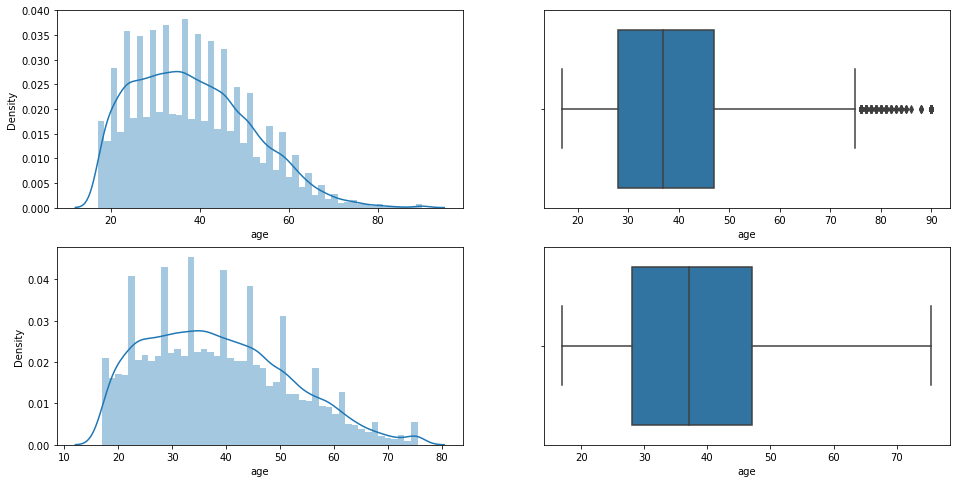

In [42]:
create_comparison_plot(data_df,df3,"age")

In [43]:
remove_outliers_IQR('fnlwgt')

percentile25 117627.25
percentile75 237628.5
Upper limit 417630.375
Lower limit -62374.625


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


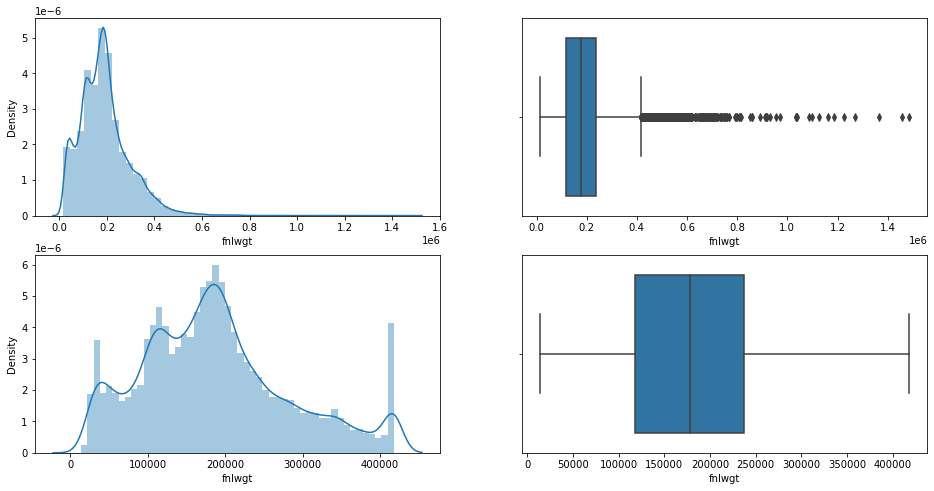

In [44]:
create_comparison_plot(data_df,df3,"fnlwgt")

In [45]:
remove_outliers_IQR('hours-per-week')

percentile25 40.0
percentile75 45.0
Upper limit 52.5
Lower limit 32.5


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


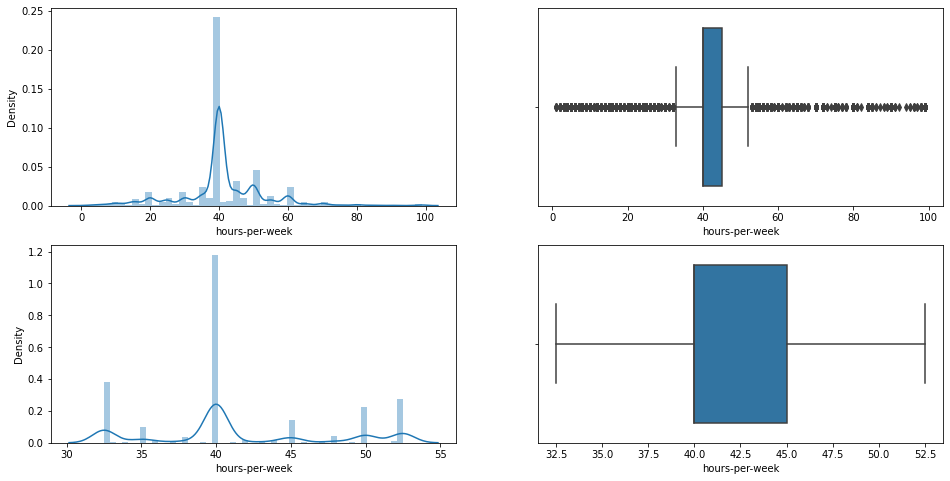

In [46]:
create_comparison_plot(data_df,df3,"hours-per-week")

## Label Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()
for col in df3.columns:
    df3[col] = le.fit_transform(df3[col])

In [53]:
df3.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,3,2491,1,12,1,0,1,4,1,24,0,8,38,0
1,33,2,2727,1,12,0,3,0,4,1,0,0,0,38,0
2,21,1,13188,3,8,2,5,1,4,1,0,0,8,38,0
3,36,1,14354,3,6,0,5,0,2,1,0,0,8,38,0
4,11,1,18120,1,12,0,9,5,2,0,0,0,8,4,0


## Variance Inflation Factor (VIF)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
num_feat = [feature for feature in data_df.columns if data_df[feature].dtype!='O']

In [62]:
dt = data_df[num_feat]

In [64]:
# Check multicollinearity
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(dt.values,i) for i in range(len(dt.columns))]
vif["Features"] = dt.columns

#let's check the values
vif

,vif,Features
0,7.835952,age
1,3.686859,fnlwgt
2,11.387562,education-num
3,1.033612,capital-gain
4,1.057617,capital-loss
5,10.615610,hours-per-week


In [66]:
# drop features which has high correlation 
df3.drop(['education-num'],axis=1,inplace=True)

In [68]:
df3

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,3,2491,1,1,0,1,4,1,24,0,8,38,0
1,33,2,2727,1,0,3,0,4,1,0,0,0,38,0
2,21,1,13188,3,2,5,1,4,1,0,0,8,38,0
3,36,1,14354,3,0,5,0,2,1,0,0,8,38,0
4,11,1,18120,1,0,9,5,2,0,0,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,10,1,15471,0,0,12,5,4,0,0,0,6,38,0
30158,23,1,7555,3,0,6,0,4,1,0,0,8,38,1
30159,41,1,7377,3,3,0,4,4,0,0,0,8,38,0
30160,5,1,12060,3,1,0,3,4,1,0,0,0,38,0


In [69]:
df3.to_csv('census_income_cleaned.csv', index = False)

## Split the data into X & y

In [71]:
# Independent and Dependent Features
X=df3.drop(['income'],axis=1)
y=df3['income']

In [72]:
X.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,3,2491,1,1,0,1,4,1,24,0,8,38
1,33,2,2727,1,0,3,0,4,1,0,0,0,38
2,21,1,13188,3,2,5,1,4,1,0,0,8,38
3,36,1,14354,3,0,5,0,2,1,0,0,8,38
4,11,1,18120,1,0,9,5,2,0,0,0,8,4


In [73]:
y

0        0
1        0
2        0
3        0
4        0
        ..
30157    0
30158    1
30159    0
30160    0
30161    1
Name: income, Length: 30162, dtype: int32

## Train Test Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.33, random_state = 42)

In [76]:
X_train.shape , y_train.shape

((20208, 13), (20208,))

In [77]:
X_test.shape, y_test.shape

((9954, 13), (9954,))

## Standardize or feature scaling the dataset

In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [79]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

### Model 1 : Using Logistic Regression

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [81]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred1 = log_reg.predict(X_test)

In [82]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})    
predictions

,Actual,Predicted
217,1,0
24913,0,0
17780,1,1
12484,0,0
8890,0,0
...,...,...
1821,0,0
30052,1,0
13730,0,0
14920,0,0


In [83]:
accuracy = accuracy_score(y_test,y_pred1)
accuracy

0.799075748442837

In [84]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred1)
conf_mat

array([[6927,  513],
       [1487, 1027]], dtype=int64)

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      7440
           1       0.67      0.41      0.51      2514

    accuracy                           0.80      9954
   macro avg       0.75      0.67      0.69      9954
weighted avg       0.78      0.80      0.78      9954



In [87]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred1)
auc

0.6697803590217363

### ROC

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

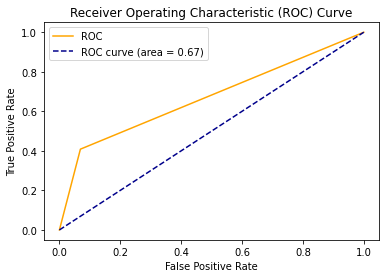

In [89]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Model 1 : Using Support Vector Classifier

In [90]:
from sklearn.svm import SVC

In [91]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred2= svc.predict(X_test)

In [92]:
accuracy = accuracy_score(y_test,y_pred2)
accuracy

0.821177416114125

In [93]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred2)
conf_mat

array([[7113,  327],
       [1453, 1061]], dtype=int64)

In [94]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7440
           1       0.76      0.42      0.54      2514

    accuracy                           0.82      9954
   macro avg       0.80      0.69      0.72      9954
weighted avg       0.81      0.82      0.80      9954



In [95]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred2)
auc

0.6890424910821977

## Hyperparameters Tuning

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
grid_param = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','polynomial','sigmoid']} 

In [98]:
grid_search=GridSearchCV(estimator=svc,param_grid=grid_param,cv=5)

In [99]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'polynomial', 'sigmoid']})

In [100]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.8287805192227466


In [103]:
model = SVC(C=1, gamma=0.1, kernel='rbf')

In [104]:
model.fit(X_train,y_train)

SVC(C=1, gamma=0.1)

In [105]:
y_pred_tuned = model.predict(X_test)

In [106]:
accuracy_score(y_test,y_pred_tuned)

0.8217801888687964

In [107]:
roc_auc_score(y_test, y_pred_tuned)

0.6939229027125516

## Comparing predicted values for all models

In [111]:
df4 = pd.DataFrame({'Actual':y_test,'Logistic':y_pred1,'SVC':y_pred2,'SVC_tuned':y_pred_tuned})
df4.head()

,Actual,Logistic,SVC,SVC_tuned
217,1,0,0,0
24913,0,0,0,0
17780,1,1,0,0
12484,0,0,0,0
8890,0,0,0,0


In [119]:
results = {'Logistic':accuracy_score(y_test,y_pred1)*100,'SVC':accuracy_score(y_test,y_pred2)*100,'SVC_tuned':accuracy_score(y_test,y_pred_tuned)*100}

In [120]:
results=pd.DataFrame(results,index=[0])

In [121]:
results

,Logistic,SVC,SVC_tuned
0,79.907575,82.117742,82.178019


## Save the model to reuse it again

In [122]:
import pickle
# Open a file, where you want to store the data
file = open('income_svc.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)
file.close()

In [123]:
model_1 = open('income_svc.pkl', 'rb')
census = pickle.load(model_1)

In [124]:
y_prediction = census.predict(X_test)

In [125]:
# testing the saved model accuracy
accuracy_score(y_test,y_prediction)

0.8217801888687964